In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('all_sites_scores.csv')
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [3]:
df.shape

(146, 8)

In [4]:
df1 = pd.read_csv('fandango_scrape.csv')
df1.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
df1.shape

(504, 4)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
df1.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

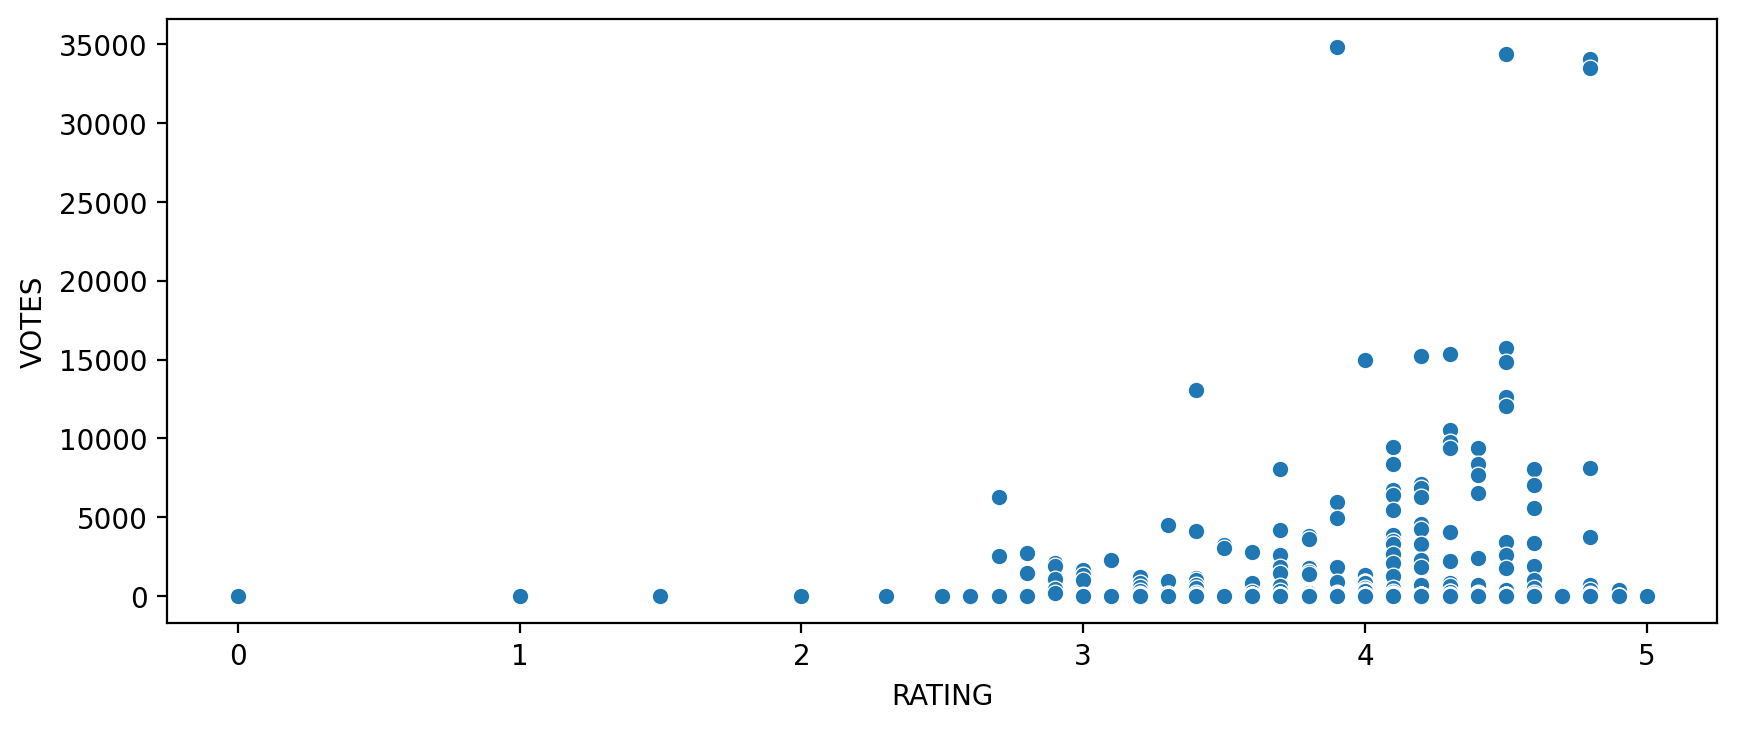

In [8]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df1, y = 'VOTES', x = 'RATING')

In [9]:
df1.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Task1: Create a new column that is able to strip the year from the title strings and set this new column as YEAR.

In [10]:
title = 'Film Title (year)'

In [11]:
title.split('(')[-1].replace(')','')

'year'

In [12]:
df1['YEAR'] = df1['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [13]:
df1

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


Task2: How many movies in the dataframe per year..?

In [14]:
df1['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Task3: Visuvalize the count of movies per year with a plot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

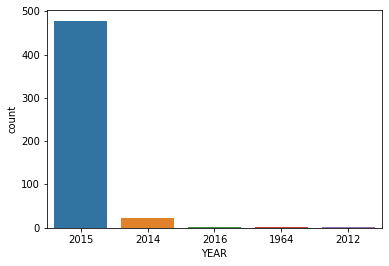

In [15]:
sns.countplot(x = 'YEAR', data = df1)

Task4: What are the 10 movies with the highest number of votes

In [16]:
df1.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Task5: How Many Movies have Zero Votes?

In [17]:
len(df1[df1['VOTES']==0])

69

Task6:Create KDE plot(or multiple kde plots) that displays the distribution of ratings
that are displayed(STARS) vesus what the true rating was from votes(RATING). clip the KDEs to 0-5

In [18]:
fan_reviewed = df1[df1['VOTES']>0]

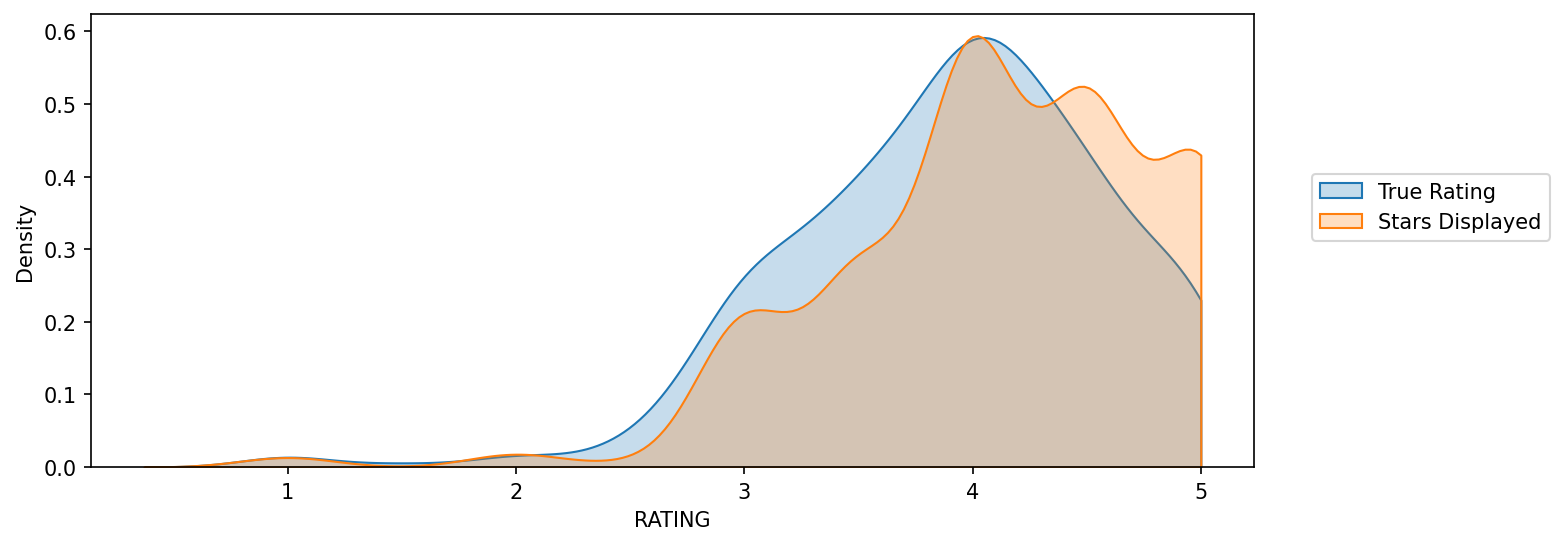

In [19]:
plt.figure(figsize = (10,4), dpi = 150)
sns.kdeplot(data = fan_reviewed, x = 'RATING',clip = [0,5],fill = True,label = 'True Rating')
sns.kdeplot(data = fan_reviewed, x = 'STARS',clip = [0,5],fill = True,label = 'Stars Displayed')
plt.legend(loc = (1.05, 0.5))

Task7: Create a new column of the difference between STARS displayed versus true Rating.
Calculate this diffeence with STARS-RATING and round these differences to the nearest decimal point

In [20]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\Users\240g_W10\AppData\Local\Temp\ipykernel_8484\1435696898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [21]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Task8: Create a count plot to display the number of times a certain differene occurs

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

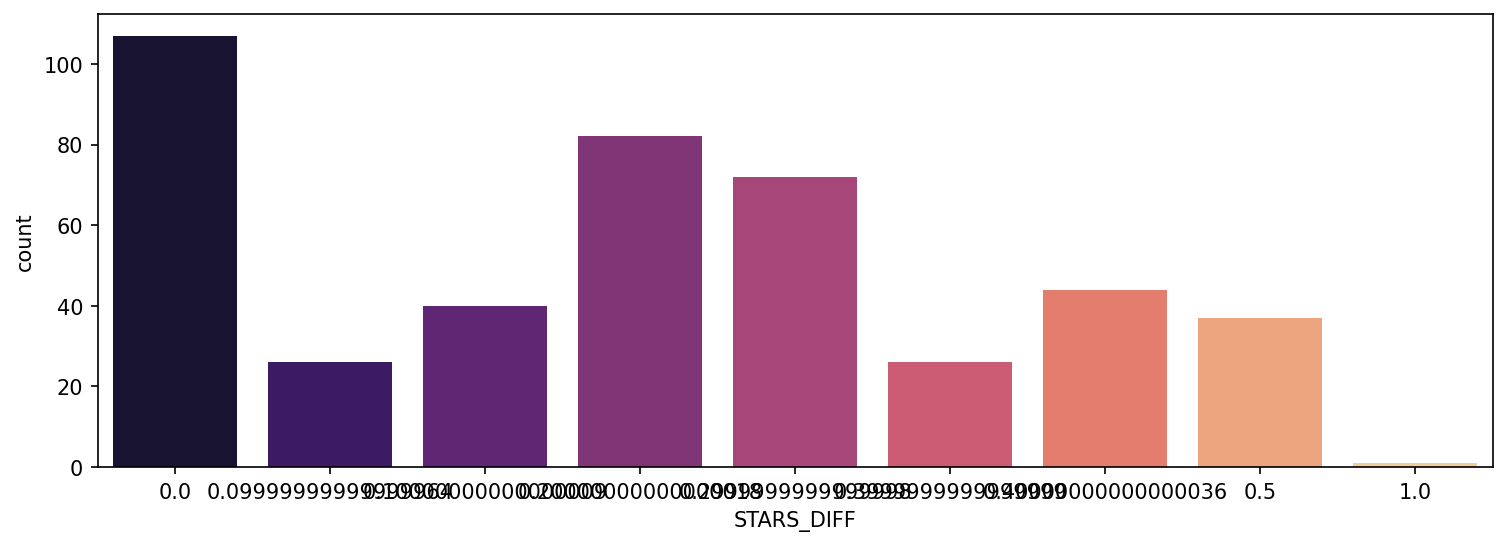

In [22]:
plt.figure(figsize = (12,4), dpi = 150)
sns.countplot(data = fan_reviewed, x = 'STARS_DIFF', palette = 'magma')

Task9: We can see from the plot that one movie was displaying over a 1 star difference than 
true rating! what movie had this close to 1 star differential?

In [23]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [24]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
df.shape

(146, 8)

In [26]:
df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [27]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

Task10:Create a scatterplot exploring the relationship between RT Critic reviews
and RT User reveiws

(0.0, 100.0)

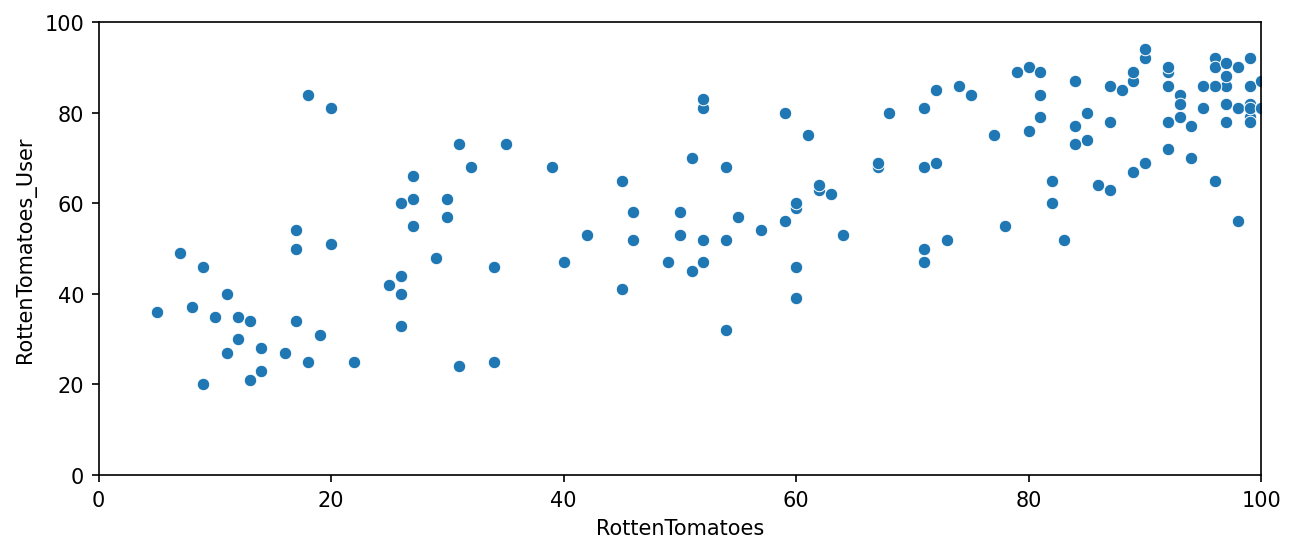

In [28]:
plt.figure(figsize = (10,4), dpi =150)
sns.scatterplot(data = df, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

Task11:Create new column based off the difference between critics ratings and user ratings for rotten tomatoes
calculate for rotten tomatoes.Calculate with rotten tomatoes-rotten tomatoes user

In [29]:
df['Rotten_Diff'] = df['RottenTomatoes']-df['RottenTomatoes_User']

In [30]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Task12: Calculate the mean absolute difference between RT scores and RT User scores as described above.

In [31]:
df['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Task13: Plot the distribution of the difference between RT Critics score and RT user score.
There should be negative values in this distribution plot.Feel feel to use KDE or Histograms to display this distribution

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

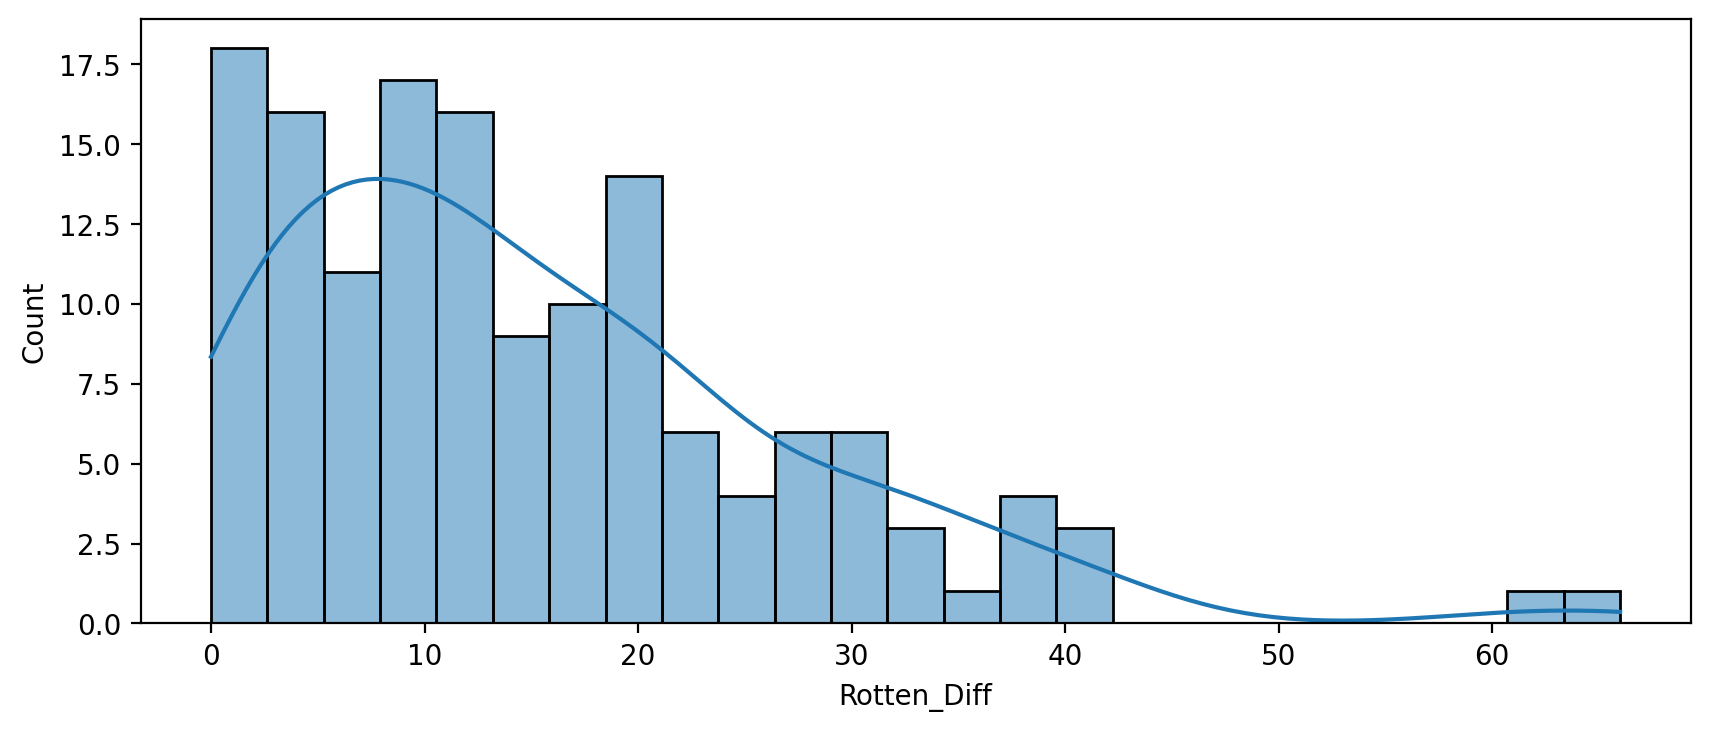

In [32]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(x= df['Rotten_Diff'].apply(abs), kde = True, bins = 25)

Task14: What are the top 5 movies users rated higher than critics on average.?

In [33]:
df.nsmallest(5, 'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

Task15: Now show the top 5 movies critics scoes higher than users on average

In [34]:
df.nlargest(5, 'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

Task16: Display the scatterplot of the Metacritic Rating versus the Metacritic User rating.

(0.0, 100.0)

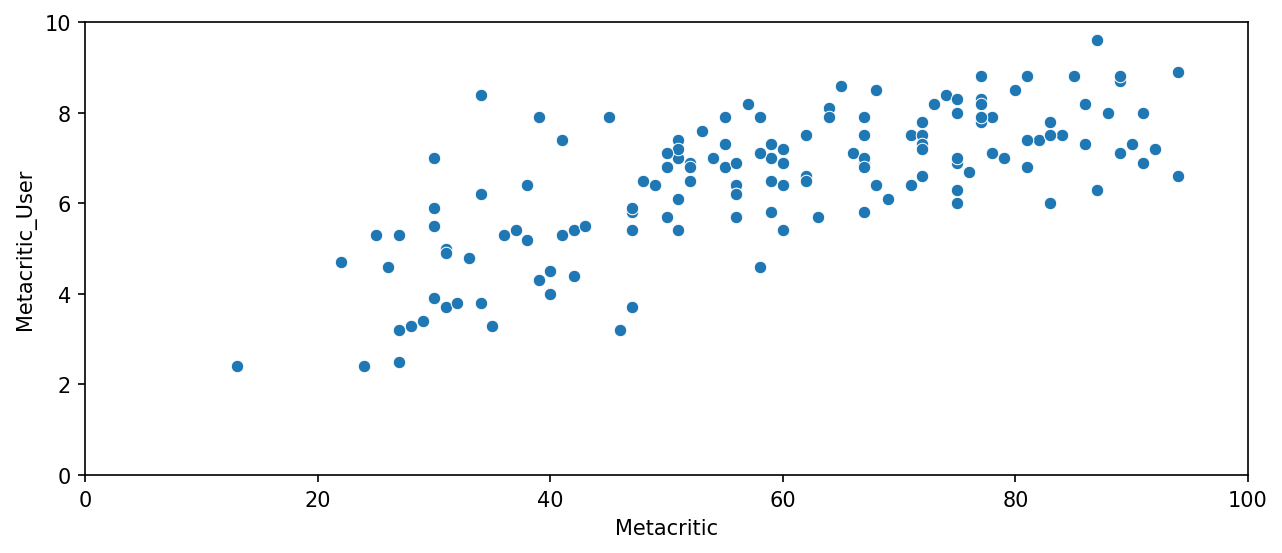

In [35]:
plt.figure(figsize = (10,4),dpi = 150)
sns.scatterplot(data = df, x= 'Metacritic', y= 'Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

Task17: Create a scatterplot for the relationship between vote counts on MataCritic values vote counts on IMDB

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='Metacritic_User'>

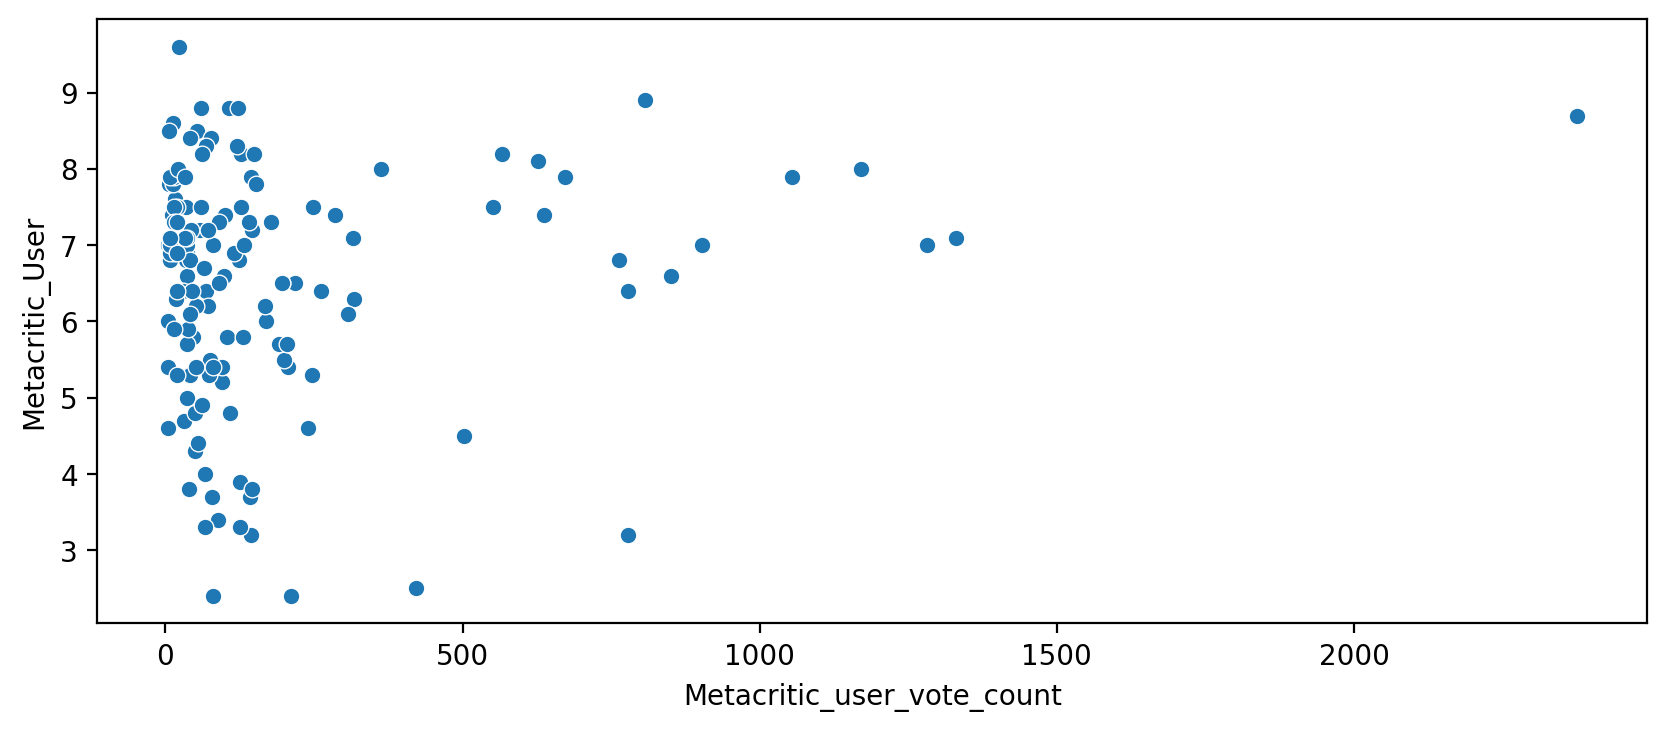

In [36]:
plt.figure(figsize = (10,4),dpi = 200)
sns.scatterplot(data = df, x = 'Metacritic_user_vote_count', y = 'Metacritic_User')

Task18: What movie has the highest IMDB user vote count..?

In [37]:
df.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


Task19: What movie has the highest Metacritic user vote count..?

In [38]:
df.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [39]:
print(df.shape)
print(df1.shape)

(146, 9)
(504, 5)


In [40]:
final_df = pd.merge(df, df1, on = 'FILM', how = 'inner')
final_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015


In [41]:
final_df.shape

(145, 13)

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   Rotten_Diff                 145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  YEAR                        145 non-null    object 
dtypes: float64(4), int64(7), object(2)


Task20: Create new normalized columns for all ratings so they match up with the 0-5 star range shown on df1.

In [43]:
final_df.describe().transpose()['max']

RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
STARS                              5.0
RATING                             4.8
VOTES                          34846.0
Name: max, dtype: float64

In [48]:
final_df['RT_Norm'] = np.round((final_df['RottenTomatoes']/20),1)
final_df['RTU_Norm'] = np.round((final_df['RottenTomatoes_User']/20),1)

In [49]:
final_df['META_Norm'] = np.round((final_df['Metacritic']/20),1)
final_df['META_USER_Norm'] = np.round((final_df['Metacritic_User']/2),1)

In [50]:
final_df['IMDB_Norm'] = np.round((final_df['IMDB']/2),1)

In [51]:
final_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR,RT_Norm,RTU_Norm,META_Norm,META_USER_Norm,IMDB_Norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.7,1.4,1.4,1.7,2.6


Task21: Now create a norm_scores dataframe that only contains the normalize ratings.include both STARS and Rating from the original df1 table

In [53]:
final_df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff', 'STARS', 'RATING', 'VOTES',
       'YEAR', 'RT_Norm', 'RTU_Norm', 'META_Norm', 'META_USER_Norm',
       'IMDB_Norm'],
      dtype='object')

In [54]:
norm_scores = final_df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'META_Norm', 'META_USER_Norm',
       'IMDB_Norm']]

In [55]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,META_Norm,META_USER_Norm,IMDB_Norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6


<AxesSubplot:ylabel='Density'>

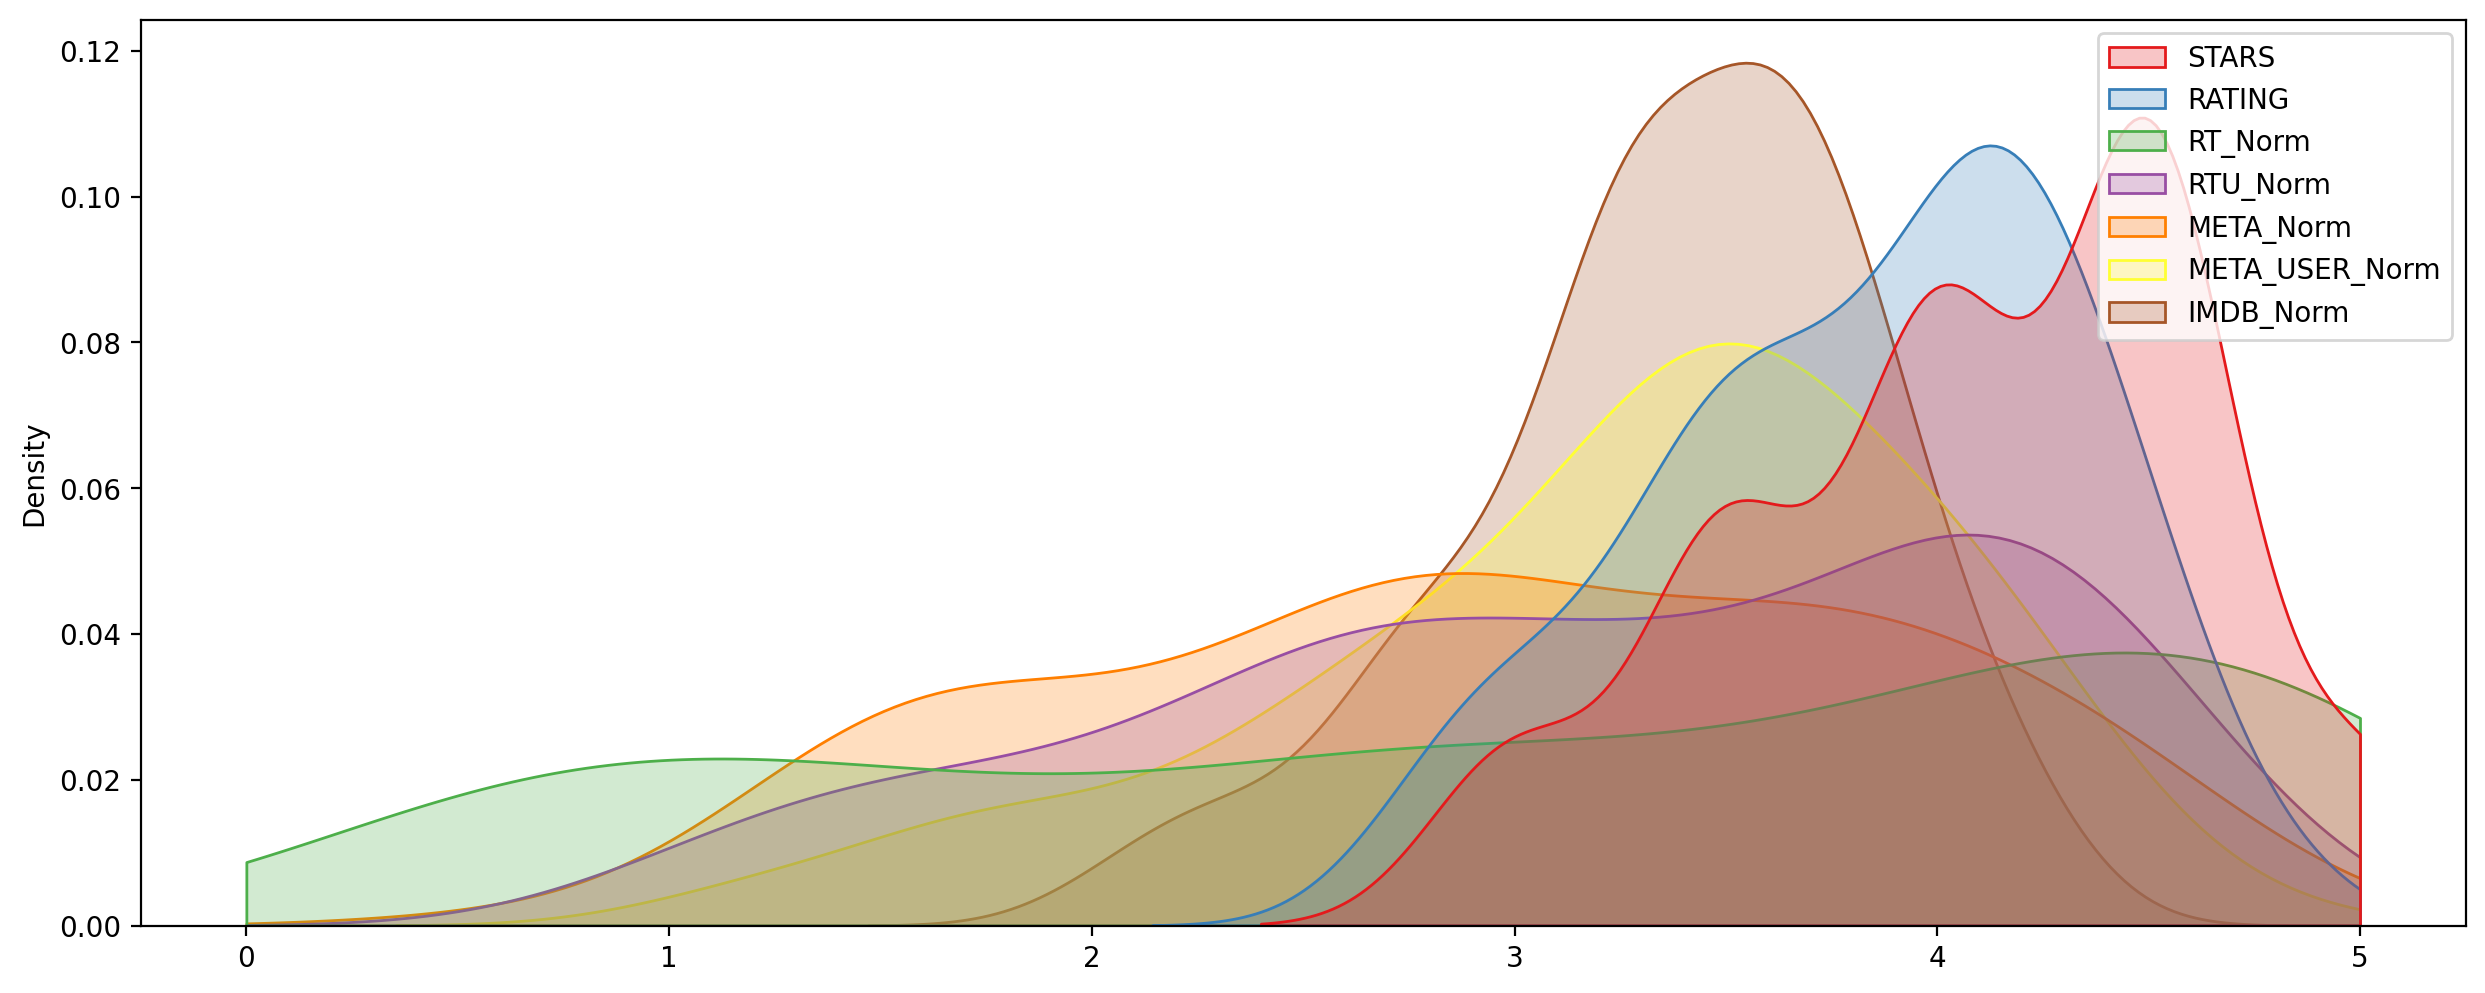

In [61]:
plt.figure(figsize = (15,6), dpi = 200)
sns.kdeplot(data = norm_scores, clip = [0,5], shade = True, palette = 'Set1')

##### Task22: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by df1

<AxesSubplot:ylabel='Density'>

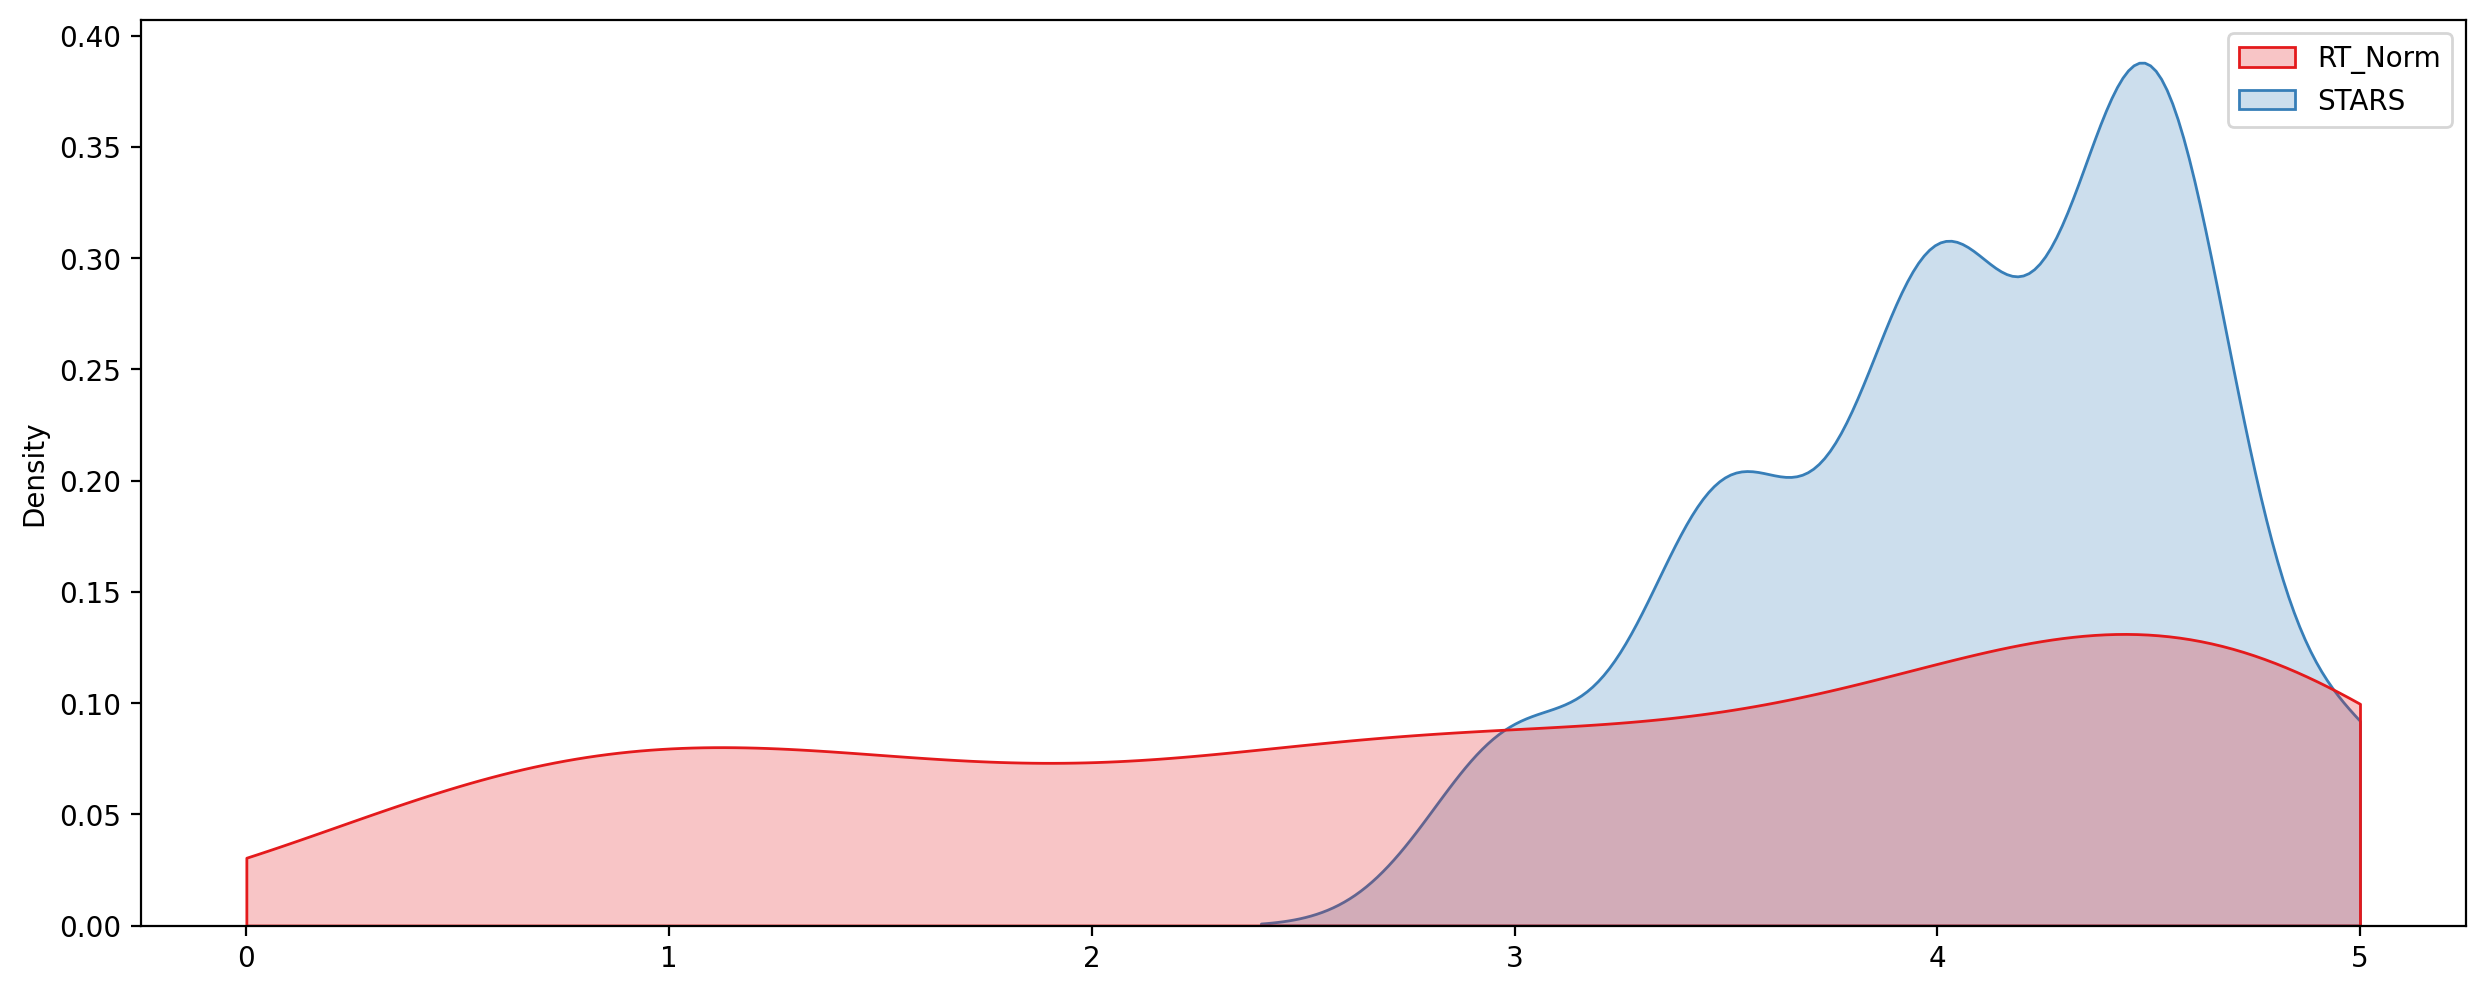

In [62]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 200)
sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], clip = [0,5], shade = True, palette = 'Set1')

<AxesSubplot:ylabel='Count'>

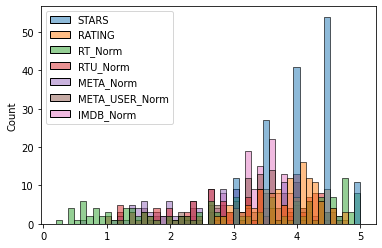

In [63]:
sns.histplot(data = norm_scores, bins = 50)

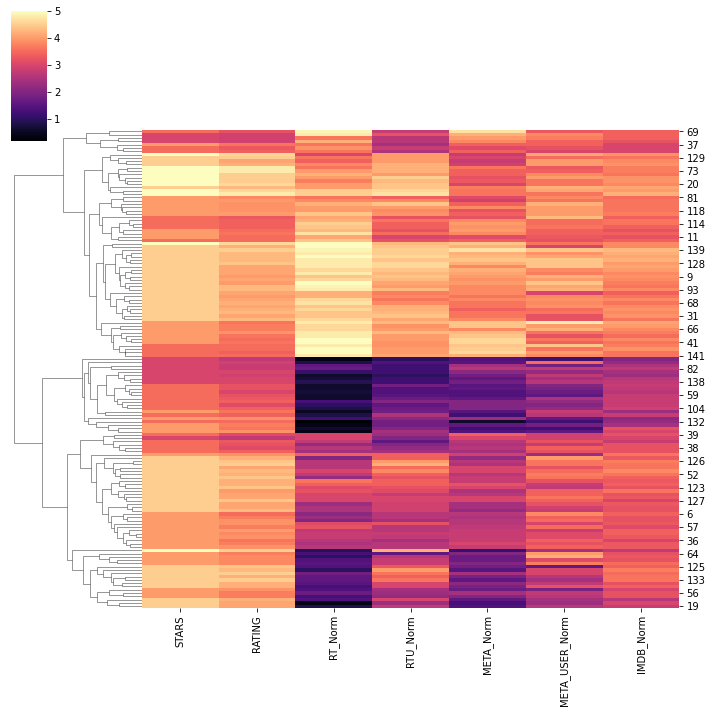

In [64]:
sns.clustermap(norm_scores, cmap = 'magma', col_cluster = False)

In [65]:
norm_films = final_df[['FILM', 'STARS', 'RATING','RT_Norm', 'RTU_Norm', 'META_Norm', 'META_USER_Norm',
       'IMDB_Norm']]

In [70]:
worst_films = norm_films.nsmallest(10 ,'RT_Norm')

In [71]:
worst_films

,FILM,STARS,RATING,RT_Norm,RTU_Norm,META_Norm,META_USER_Norm,IMDB_Norm
132,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
15,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
48,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
53,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
105,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
33,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
35,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
58,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
59,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
60,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


<AxesSubplot:ylabel='Density'>

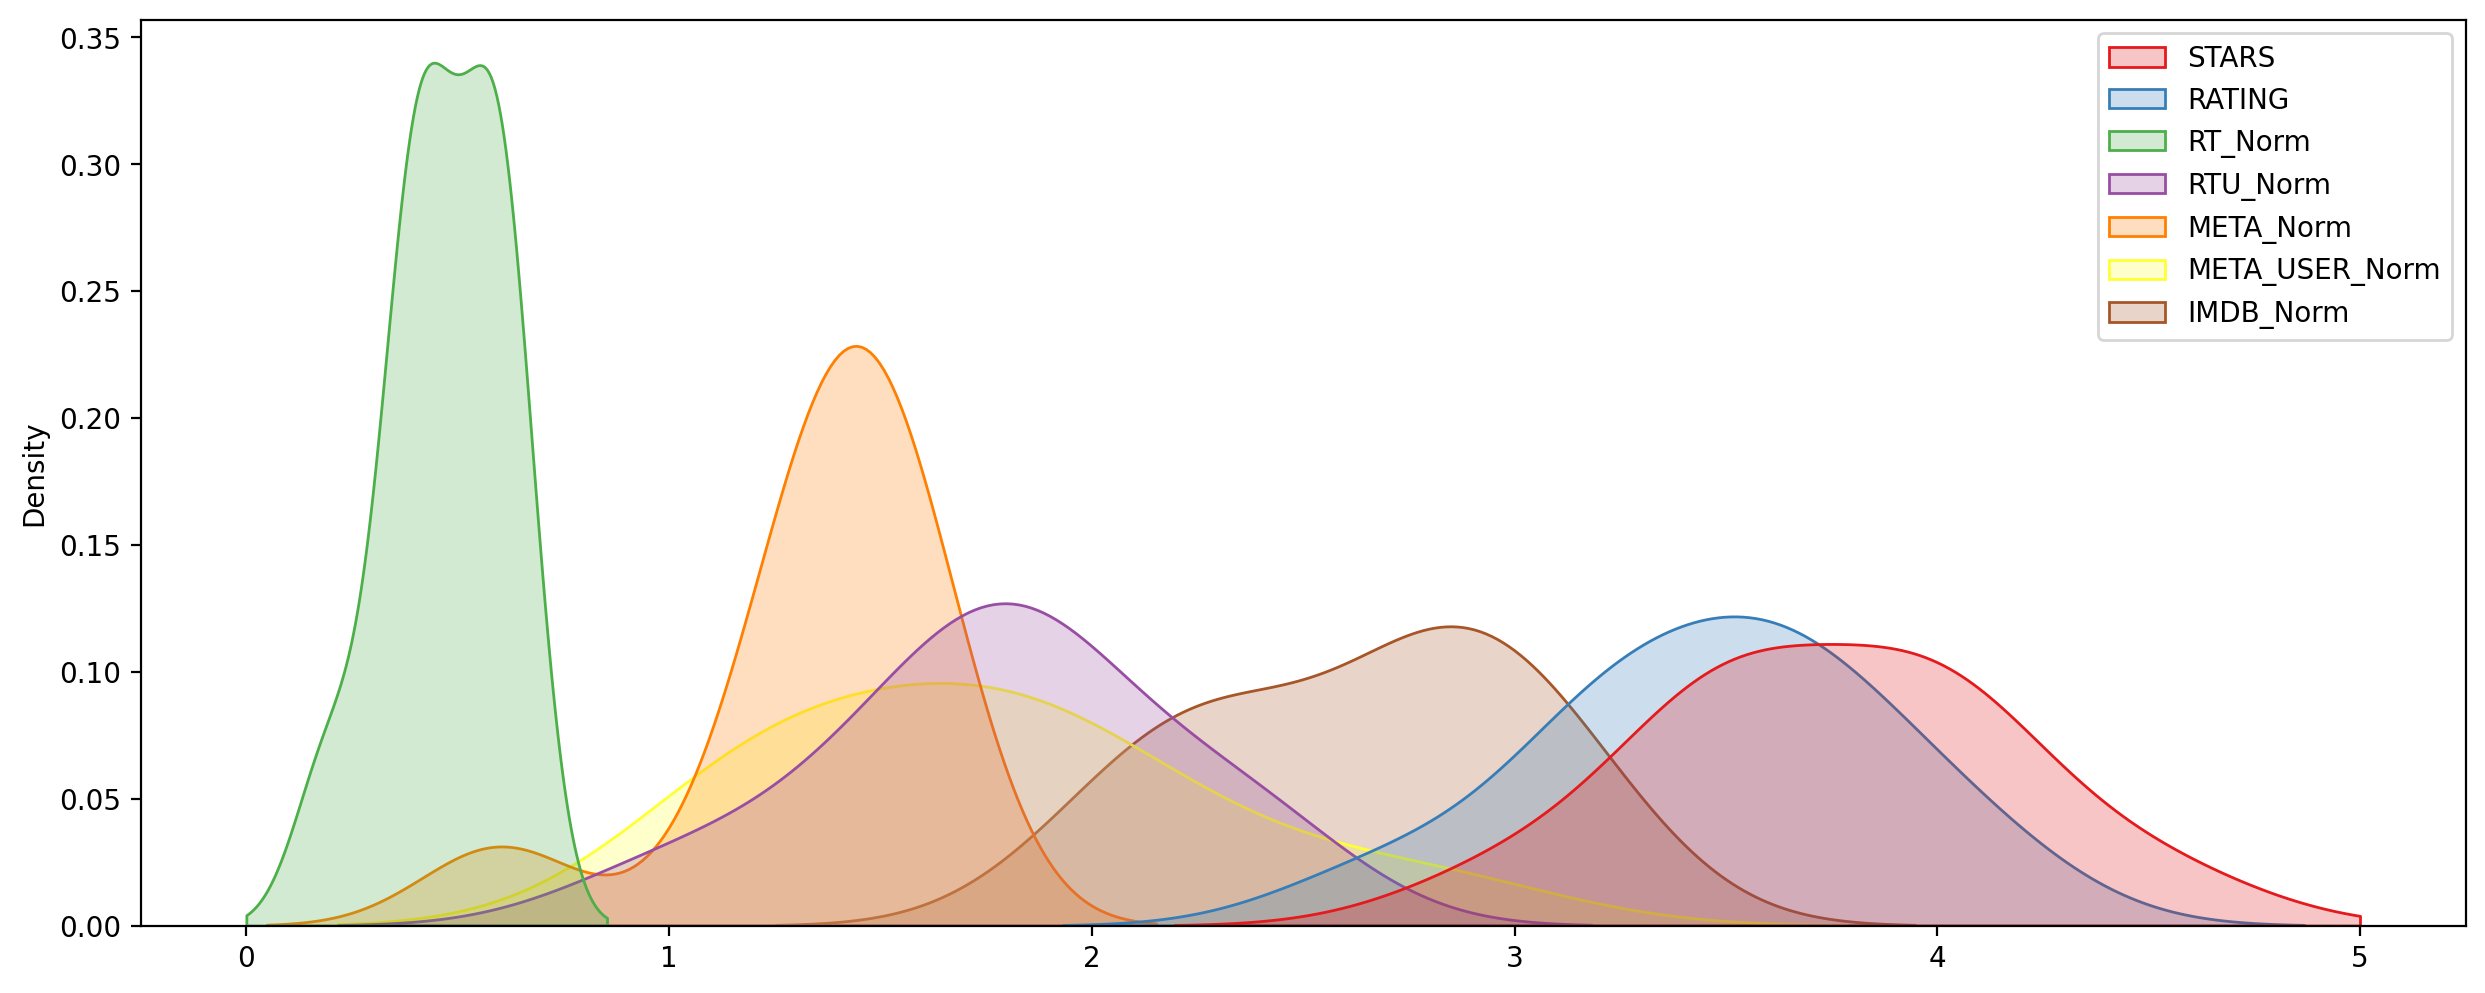

In [72]:
plt.figure(figsize = (15,6), dpi = 200)
sns.kdeplot(data = worst_films, clip = [0,5], shade = True, palette = 'Set1')